## Errores y depuración 

El desarrollo de código y el análisis de datos siempre requieren un poco de prueba y error y  IPython-Jupyter  contiene herramientas para agilizar este proceso. Brevemente mencionaremos  opciones para controlar el informe de excepciones de Python, seguido por la exploración de herramientas para depurar errores en el código.

### Controlando excepciones %xmode

La mayor parte del tiempo cuando un script de Python falla, generar  una `excepción`. Cuando el intérprete realiza una de estas excepciones, la información sobre la causa del error se puede encontrar en el rastreo, al que se puede acceder desde  Python. Con la función mágica `% xmode` , IPython  permite controlar la cantidad de información impresa cuando se genera la excepción. Veamos algunos ejemplos:

In [1]:
def func1(a, b):
    return a / b

def func2(x):
    a = x
    b = x - 1
    return func1(a, b)

In [2]:
func2(1)

ZeroDivisionError: division by zero

Llamar a la función `func2` produce un error y leer el trazado impreso nos permite ver exactamente lo que sucedr. De forma predeterminada, esta traza incluye varias líneas que muestran el contexto de cada paso que provocó el error. Utilizando la función mágica `% xmode` (abreviatura para el modo Exception) podemos cambiar la información que se imprime.

`% xmode` toma un solo argumento, el modo  y hay tres posibilidades: `Plain, Context` y `Verbose`. El valor predeterminado es `Context`  y da salida como la que se muestra anteriormente. `Plain` es más compacto y da menos información.

In [3]:
%xmode Plain

Exception reporting mode: Plain


In [4]:
func2(1)

ZeroDivisionError: division by zero

El modo `Verbose` añade alguna información adicional, incluidos los argumentos a las funciones que se llaman.

In [5]:
%xmode Verbose

Exception reporting mode: Verbose


In [6]:
func2(1)

ZeroDivisionError: division by zero

## Depuración en Ipython - Jupyter 

La herramienta Python estándar para la depuración interactiva es `` pdb``, el depurador de Python. Este depurador permite al usuario recorrer el código línea por línea para ver qué podría estar causando un error.

La versión mejorada de IPython es `` ipdb``, el depurador de IPython. Hay muchas maneras de lanzar y utilizar ambos depuradores. En IPython, quizás la interfaz más conveniente para depurar sea el comando mágico ``% debug``. Si lo llama después de pulsar una excepción, abrirá automáticamente un indicador de depuración interactivo en el punto de la excepción. El indicador `` ipdb`` le permite explorar el estado actual de la pila, explorar las variables disponibles e incluso ejecutar comandos de Python. 

In [7]:
%debug

> <ipython-input-1-d849e34d61fb>(2)func1()
      1 def func1(a, b):
----> 2     return a / b
      3 
      4 def func2(x):
      5     a = x

ipdb> print(a)
1
ipdb> print(b)
0
ipdb> quit


Esto  permite averiguar rápidamente no sólo lo que causó el error, sino las llamadas de función que condujeron  hasta el error. Si deseamos  que el depurador se inicie automáticamente cada vez que se genera una excepción, podemos  utilizar la función mágica `% pdb`  para activar este comportamiento automático.

In [8]:
%xmode Plain
%pdb on
func2(1)

Exception reporting mode: Plain
Automatic pdb calling has been turned ON


ZeroDivisionError: division by zero

> <ipython-input-1-d849e34d61fb>(2)func1()
      1 def func1(a, b):
----> 2     return a / b
      3 
      4 def func2(x):
      5     a = x

ipdb> print(a)
1
ipdb> quit


Por último, si se tiene una secuencia de comandos que se  desea ejecutar desde el principio en modo interactivo, puede ejecutarse  con el comando `% run -d` y utilizar el siguiente comando para recorrer interactivamente las líneas de código.

Hay muchos más comandos disponibles para la depuración interactiva. La siguiente tabla contiene una descripción de alguno de los más comunes y útiles:

| Comando         |                    Descripcion                                             |
|-----------------|----------------------------------------------------------------------------|
| ``list``        | Muestra la ubicación actual en el archivo                                  |
| ``h(elp)``      | Muestra una lista de comandos o encuentra ayuda de   un comando específico |
| ``q(uit)``      | Quitamos el depurador y el programa                                        |
| ``c(ontinue)``  | Sale del depurador,  y continua  en el programa                            |
| ``n(ext)``      | Ir al siguiente paso del programa                                          |
| ``<enter>``     | Repite os comandos previos                                                 |
| ``p(rint)``     | Imprime  variables                                                         |
| ``s(tep)``      | Entra  en una subrutina                                                    |
| ``r(eturn)``    | Retorno de una subrutina                                                   |

## Perfiles y tiempo de ejecución

Cuando tenemos código que funciona, puede ser útil  verificar y profundizar en la eficiencia . A veces es útil comprobar el tiempo de ejecución de un comando dado o conjunto de comandos o  verificar  un proceso multilínea y determinar dónde se encuentra  el cuello de botella de alguna complicada serie de operaciones. IPython proporciona acceso a una amplia gama de funcionalidades para este tipo de sincronización y creación de perfiles de código. Veamos algunas:

* `%time`: Tiempo de ejecución de una sola instrucción.

* `%timeit`: Tiempo de ejecución repetida de una única sentencia para mayor precisión.

* `%prun`: Ejecuta el código con el generador de perfiles.

* `%lprun`: Ejecuta código con el generador de línea por línea.

* `%memit`: Mide el uso de memoria de una sola sentencia.

*  `%mprun`: Ejecuta el código con el generador de perfiles de memoria línea por línea.

### %timeit y %time 

Estos comandos mágicos, se pueden  utilizar para el tiempo de ejecución repetida de fragmentos de código:

In [9]:
%timeit sum(range(1000))

10000 loops, best of 3: 36.7 µs per loop


Ten en cuenta que debido a esta operación es muy rápida, %timeit hace automáticamente un gran número de repeticiones. Para comandos más lentos, % timeit se ajustará automáticamente y realizará menos repeticiones:

In [10]:
%%timeit
total = 0
for i in range(1000):
    for j in range(1000):
        total += i * (-1) ** j

1 loop, best of 3: 711 ms per loop


A veces repetir una operación no es la mejor opción. Por ejemplo, si tenemos una lista que  queremos ordenar, podríamos ser engañados por una operación repetida. Ordenar una lista pre-ordenada es mucho más rápido que ordenar una lista sin ordenar, por lo que la repetición desviará el resultado:

In [11]:
import random
L = [random.random() for i in range(100000)]
%timeit L.sort()

The slowest run took 19.16 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 3.89 ms per loop


Para esto, la función `%time` puede ser una mejor opción. También es una buena opción para comandos de más larga duración, cuando es poco probable que los retrasos relacionados con el sistema afecten al resultado. 

In [12]:
import random
L = [random.random() for i in range(100000)]
print("Ordenando  una lista sin ordenar:")
%time L.sort()

Ordenando  una lista sin ordenar:
CPU times: user 73.4 ms, sys: 0 ns, total: 73.4 ms
Wall time: 73 ms


In [13]:
print("ordenando una lista ya ordenada:")
%time L.sort()

ordenando una lista ya ordenada:
CPU times: user 6.12 ms, sys: 0 ns, total: 6.12 ms
Wall time: 6.03 ms


Observa cuánto más rápida es la ordenación de la lista sin ordenar, pero observa también cuánto tiempo tarda  con `%time` y `timeit`, para la lista sin ordenar. Esto es resultado  de que `%timeit` evita  que las llamadas del sistema interfieran con el tiempo de ejecución. Por esta razón, `% timeit`  suele ser más rápido que `%time`.

### Numba

La biblioteca [numba](http://numba.pydata.org/) proporciona un compilador `just-in-time` para python y  código numpy que se basa en el compilador LLVM. La principal ventaja de numba es que puede generar código de máquina con un mínimo o ningún cambio al código original de python.

Uno de los aspectos más atractivos de la biblioteca  Numba es que a menudo se puede utilizar para acelerar el código de Python que utiliza NumPy. Lo único que tenemos que hacer es decorar una función con el decorador `@ numba.jit`, que hace  del código más rápido que el código  de Python, por un factor de varios cientos o más. La aceleración se obtiene principalmente para funciones que utilizan matrices NumPy.

In [14]:
def py_suma(data):
    s = 0
    for d in data:
        s += d
    return s

Los bucles en Python son notoriamente lentos, debido a la flexibilidad de Python y la tipificación dinámica. Para cuantificar esta afirmación y comparar la función `sum_1`, generamos una matriz con `50.000` números aleatorios y usamos el comando `% timeit` de IPython para medir el tiempo de cálculo típico:

In [15]:
import numpy as np

data = np.random.randn(50000)
%timeit py_suma(data)

100 loops, best of 3: 9.79 ms per loop


El resultado sugiere que la suma de los 50.000 elementos en el array `data` utilizando la función `py_suma` suele tardar 9,81 milisegundos en este sistema en particular. Comparado con otros métodos que exploramos a continuación, este no es un buen rendimiento.

La solución usual es utilizar operaciones de matriz, como las proporcionadas por NumPy, en lugar de iterar sobre las matrices manualmente. De hecho, NumPy proporciona la función de `sum` que hace exactamente lo que queremos hacer aquí.

Para comprobar que la función `py_suma` definida anteriormente produce los mismos resultados que la función de `sum` de NumPy, usamos la declaración `assert` para este efecto:

In [16]:
assert abs(py_suma(data) - np.sum(data)) < 1e-10

Dado que assert no produce un error, concluimos que las dos funciones producen el mismo resultado. A continuación, comparamos la función de sum de NumPy usando %timeit de la misma manera que usamos anteriormente:

In [17]:
%timeit np.sum(data)

The slowest run took 4.83 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 43 µs per loop


La función de `sum` de NumPy es varios cientos de veces más rápida que la función `py_suma`, lo que demuestra que las expresiones y operaciones vectorizadas utilizando, por ejemplo, por  NumPy es la clave para un buen rendimiento en Python. Vemos los mismos fenómenos para otras funciones que usan para bucles. Por ejemplo, considere también la suma acumulativa, `py_cumsum` :

In [18]:
def py_cumsum(data):
    salida = np.zeros_like(data)
    s = 0
    for n in range(len(data)):
        s += data[n]
        salida[n] = s
    return salida

Comparemos esta función con respecto a la función correspondiente de Numpy:

In [19]:
%timeit py_cumsum(data)

10 loops, best of 3: 20.7 ms per loop


In [20]:
%timeit np.cumsum(data)

1000 loops, best of 3: 270 µs per loop


Ahora veamos cómo se puede utilizar Numba para acelerar las funciones `py_suma` y `py_cumsum`. Para activar la compilación JIT de una función, simplemente aplicamos el decorador `@ numba.jit`:

In [21]:
import numba 
@numba.jit
def jit_suma(data):
    s = 0
    for d in data:
        s += d
    return s

Ahora verificamos que la función JIT produce el mismo resultado que la función `sum` de Numpy y los comparamos con la función `%timeit`:

In [22]:
assert abs(jit_suma(data) - np.sum(data)) < 1e-10

In [23]:
%timeit jit_suma(data)

10000 loops, best of 3: 89.5 µs per loop


Comparado con las funciones de Python, la función `jit_suma` es aproximadamente `300` veces más rápida y alcanza un rendimiento que es comparable a la función  `sum` de  NumPy a pesar de estar escrito en Python puro.

Además de que  `JIT`  compila una función aplicando el decorador `numba.jit` cuando se define la función, podemos aplicar el decorador después. Por ejemplo, para cuando `JIT` compila la función `py_cumsum` que definimos anteriormente, podemos usar:

In [24]:
jit_cumsum = numba.jit()(py_cumsum)

Verificamos que la función resultante `jit_cumsum` efectivamente produce el mismo resultado que la función de  NumPy correspondiente y la comparamos usando `%timeit`:

In [25]:
assert np.allclose(np.cumsum(data), jit_cumsum(data))

In [26]:
%timeit jit_cumsum(data)

10000 loops, best of 3: 120 µs per loop


En este caso, la función `jit_cumsum` supera a la función `cumsum` de NumPy. La función `cumsum ` de NumPy  es más versátil que la función `jit_cumsum`, por lo que la comparación no es del todo justa, pero es notable que podamos alcanzar un rendimiento comparable al código compilado por JIT compilando código Python con un solo decorador de funciones. Esto nos permite usar cálculos basados en bucle en Python sin bajar  el rendimiento, lo cual es particularmente útil para algoritmos que no son fácilmente escritos en forma vectorizada.

### % prun

Un programa se hace de muchas declaraciones individuales y a veces el tiempo de ejecución de estas declaraciones en el contexto es más importante que el tiempo de ejecución en  forma individual. Python contiene un generador de perfiles incorporado (que se puede leer en la documentación de Python), pero IPython ofrece una forma mucho más conveniente de usar este profiler, en forma de la función mágica `%prun`. Veamos un ejemplo:

In [27]:
def suma_de_listas(N):
    total = 0
    for i in range(5):
        L = [j ^ (j >> i) for j in range(N)]
        total += sum(L)
    return total

In [28]:
%prun suma_de_listas(1000000)

El resultado es una tabla que indica, en orden de tiempo cada llamada de función, donde la ejecución está pasando más tiempo. En este caso, la mayor parte del tiempo de ejecución se encuentra en la lista de comprensión dentro de `suma_de_listas`. A partir de aquí, podríamos empezar a pensar en los cambios que podríamos hacer para mejorar el rendimiento en el algoritmo.

Para obtener más información sobre `% prun`, así como sus opciones disponibles, utiliza la funcionalidad de ayuda de IPython (es decir, escribe `% prun?`  en el indicador de IPython y Jupyter).

### %lprun

A veces es conveniente tener un informe  línea por línea en los códigos de Python. Esta propiedad  no está integrada en Python o IPython, pero hay un paquete `line_profiler` disponible para la instalación que puede hacer esto. Podemos instalar este paquete utilizando `pip` o `conda`.

```
pip install line_profiler
```

In [29]:
%load_ext line_profiler

In [30]:
%lprun -f suma_de_listas suma_de_listas(5000)

La información en la parte superior nos da la clave para leer los resultados: el tiempo se informa en microsegundos y podemos ver donde el programa está pasando más tiempo. En este punto, podemos ser capaces de usar esta información para modificar aspectos del programa  y hacer que funcione mejor .

Para obtener más información sobre `%lprun`, así como sus opciones disponibles, utiliza la funcionalidad de ayuda de IPython (es decir, escribe `%lprun?` en el indicador de IPython).

### %memit and %mprun

Otro aspecto del perfilado es la cantidad de memoria que una operación utiliza. Esto se puede evaluar con otra extensión de IPython, `memory_profiler`.  Al igual que con `line_profiler`, comenzamos a instalar:

```
pip install memory_profiler
```

In [31]:
%load_ext memory_profiler

La extensión  contiene dos funciones mágicas útiles: `% memit` (que ofrece un equivalente de  memoria a % `timeit`) y la función `%mprun` (que ofrece un equivalente de memoria a % `lprun`). La función `%memit` se puede utilizar de forma más sencilla:

In [32]:
%memit suma_de_listas(1000000)

peak memory: 162.72 MiB, increment: 74.32 MiB


Vemos que esta función utiliza alrededor de 150 MB de memoria.

Para una descripción línea por línea del uso de memoria, podemos usar % mprun. Desafortunadamente, esta función funciona sólo para funciones definidas en módulos independientes , por lo que comenzaremos usando el comando mágico %%file para crear un módulo llamado mprun_demo.py, que contiene la función suma_de_listas, con una adición que hará que nuestros resultados de perfil de memoria más claros:


In [33]:
%%file mprun_demo.py
def suma_de_listas(N):
    total = 0
    for i in range(5):
        L = [j ^ (j >> i) for j in range(N)]
        total += sum(L)
    return total

Overwriting mprun_demo.py


Ahora podemos importar la nueva versión de esta función y ejecutar el profiler de la línea de memoria:

```
from mprun_demo import suma_de_listas
%mprun -f suma_de_listas suma_de_listas(10000)
```

Para obtener más información sobre `% memit` y `% mprun`, así como sus opciones disponibles, utiliza la funcionalidad de ayuda de IPython (es decir, escriba `% memit?` en el indicador de IPython-Jupyter).

### Ejemplo1 

In [34]:
import numpy as np
import pandas as pd
np.random.seed(1234)
pd.__version__

'0.18.1'

In [35]:
arr = np.random.randn(1000000, 10)

In [36]:
df = pd.DataFrame(arr)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
0    1000000 non-null float64
1    1000000 non-null float64
2    1000000 non-null float64
3    1000000 non-null float64
4    1000000 non-null float64
5    1000000 non-null float64
6    1000000 non-null float64
7    1000000 non-null float64
8    1000000 non-null float64
9    1000000 non-null float64
dtypes: float64(10)
memory usage: 76.3 MB


Construyendo esto desde un array de Numpy:

In [37]:
%timeit pd.DataFrame(arr)

10000 loops, best of 3: 149 µs per loop


In [38]:
data_suma = df.sum()
data_suma

0    1405.248349
1     717.455769
2     -41.601276
3    -735.066948
4      24.217678
5     879.240977
6   -1041.996276
7     967.221230
8    -561.771728
9    -901.415467
dtype: float64

In [39]:
%timeit df.sum()

10 loops, best of 3: 78.3 ms per loop


### Ejemplo 2

In [40]:
df1 = pd.DataFrame(np.random.randn(10000000,2),columns=list('AB'))
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 2 columns):
A    float64
B    float64
dtypes: float64(2)
memory usage: 152.6 MB


In [41]:
import numexpr as ne

def f_vectorizado_numpy(df1):
    return (df1['A'].values*2 + df1['B'].values + 1).sum()
def f_vectorizado_pandas(df1):
    return (df1['A']*2 + df1['B'] + 1).sum()
def f_numexpr(df1):
    a = df1['A'].values
    b = df1['B'].values
    return ne.evaluate('sum(a*2 + b + 1)',local_dict = { 'a' : a, 'b' : b }).item()

In [42]:
import numba
@numba.jit
def _numba(a, b):
    resultado = 0.0
    assert len(a) == len(b)
    for i in range(len(a)):
        resultado += a[i]*2 + b[i] + 1.0
    return resultado

def f_numba(df1):
    return _numba(df1['A'].values,df1['B'].values)

In [43]:
np.var([f_vectorizado_numpy(df1),f_vectorizado_pandas(df1),f_numexpr(df1),f_numba(df1)])

5.0376369742366478e-15

In [44]:
%timeit f_vectorizado_numpy(df1)

1 loop, best of 3: 161 ms per loop


In [45]:
%timeit f_vectorizado_pandas(df1)

10 loops, best of 3: 160 ms per loop


In [46]:
%timeit f_numexpr(df1)

10 loops, best of 3: 57.3 ms per loop


In [47]:
%timeit f_numba(df1)

10 loops, best of 3: 26.5 ms per loop


### Ejemplo 3

In [48]:
# Metodos de indexado

def f_ix(df):
    df.ix[0,0] = 0
def f_loc(df):
    df.loc[0,'A'] = 0
def f_iloc(df):
    df.iloc[0,0] = 0
def f_at(df):
    df.at[0,'A'] = 0
def f_iat(df):
    df.iat[0,0] = 0
def f_numpy(df):
    df.values[0,0] = 0

def cf():    
    return pd.DataFrame(np.random.randn(100000,2),columns=list('AB'))

In [49]:
def numpy_iterativo(df):
    na = df.values
    for i in range(len(df)):
        na[i,0] = 0
def pandas_iterativo(df):
    for i in range(len(df)):
        df.iat[i,0] = 0
def pandas_vectorizado(df2):
    df.iloc[:,0] = np.zeros(len(df))

In [50]:
t = {}

In [51]:
df = cf()
x = %timeit -o -r 1 numpy_iterativo(df)
t['numpy_iterativo'] = x.best

10 loops, best of 1: 27.5 ms per loop


In [52]:
df = cf()
x = %timeit -o -r 1 pandas_iterativo(df)
t['pandas_iterativo'] = x.best

1 loop, best of 1: 1.68 s per loop


In [53]:
df = cf()
x = %timeit -o -r 1 pandas_vectorizado(df)
t['pandas_vectorizado'] = x.best

The slowest run took 41.26 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 1: 925 µs per loop


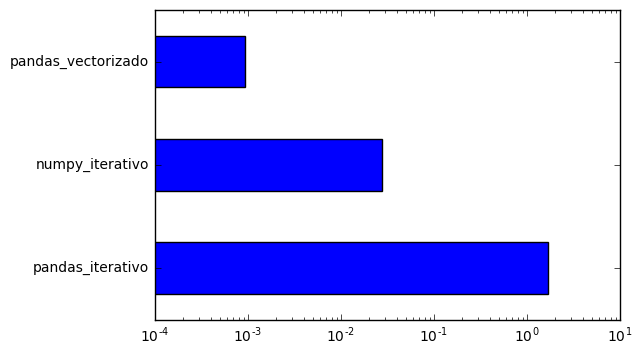

In [55]:
%matplotlib inline
(pd.Series(t).sort_values(ascending=False)
          .plot
          .barh(log=True)
 )

### Ejemplo 4

In [56]:
# Secuencia de coordenadas que representan un camino aleatorio desde un origen

origen = {'lat': 34, 'lon': -120}
np.random.seed(1)
n = 100000
cambios = np.random.randn(n, 2) / 30
cambios[0] = [0, 0]
traza = pd.DataFrame.from_records(cambios, columns=['lat', 'lon']).cumsum()
traza['lat'] += origen['lat']
traza['lon'] += origen['lon']

traza.head()


,lat,lon
0,34.000000,-120.000000
1,33.982394,-120.035766
2,34.011241,-120.112484
3,34.069402,-120.137857
4,34.080036,-120.146169


In [57]:
# Calculemos las distancias entre el origen y el camino aleatorio
# via la formula de Haversine (distancia usada por los GPS)

from math import radians, cos, sin, asin, sqrt
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculamos la distancia entre dos puntos de la tierra (espec. lat/lon)
    """
    # convertimos a radianes
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # Formula haversine 
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))
    radio_tierra = 6367
    distancia_km = radio_tierra * c
    return distancia_km

In [58]:
# Implementemos algunas funciones para implementar la distancia maxima del camino aleatorio al origen

def distancias1(traza ,origen):
    distancia = {}
    for i in traza.index:
        distancia[i] = haversine(traza['lat'].loc[i], traza['lon'].loc[i], origen['lat'], origen['lon'])
    distancia = pd.Series(distancia)
    return distancia

def distancia_mayor(traza, origen):
    distancia1 = distancias1(traza, origen)
    max_idx = distancia1.argmax()
    return traza.loc[max_idx], distancia1.loc[max_idx]

In [59]:
distancia_mayor(traza, origen)

(lat     54.648484
 lon   -109.343278
 Name: 97647, dtype: float64, 2439.5707960599893)

In [60]:
# Usamos timeit para el tiempo de ejecucion

%timeit distancias1(traza, origen)

1 loop, best of 3: 12 s per loop


In [61]:
# Utilizamos lprun para averiguar por que estan lento el codigo

%lprun -f distancias1 distancias1(traza, origen)

Analicemos `distancias1`, con `lprun`, que parece que es el problema...

In [62]:
%lprun -f distancias1 distancia_mayor(traza, origen)

Ahora   la función `haversine()`  parace ser  el problema...

In [63]:
%lprun -f haversine distancia_mayor(traza, origen)

Parece que el problema no es la función en si sino el bucle alrededor de el.